<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Обучение-моделей*" data-toc-modified-id="Обучение-моделей*-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обучение моделей*</a></span></li><li><span><a href="#Модель-LogisticRegression" data-toc-modified-id="Модель-LogisticRegression-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Модель LogisticRegression</a></span></li><li><span><a href="#Модель-LinearSVC" data-toc-modified-id="Модель-LinearSVC-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Модель LinearSVC</a></span></li><li><span><a href="#Модель-RandomForestClassifier" data-toc-modified-id="Модель-RandomForestClassifier-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Модель RandomForestClassifier</a></span></li><li><span><a href="#Модель-градиентного-бустинга-XGBClassifier" data-toc-modified-id="Модель-градиентного-бустинга-XGBClassifier-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Модель градиентного бустинга XGBClassifier</a></span></li><li><span><a href="#Модель-градиентного-бустинга-CatBoostClassifier" data-toc-modified-id="Модель-градиентного-бустинга-CatBoostClassifier-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Модель градиентного бустинга CatBoostClassifier</a></span></li><li><span><a href="#Модель-градиентного-бустинга-LGBMClassifier" data-toc-modified-id="Модель-градиентного-бустинга-LGBMClassifier-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Модель градиентного бустинга LGBMClassifier</a></span></li><li><span><a href="#Проверка-модели-на-вменяемость" data-toc-modified-id="Проверка-модели-на-вменяемость-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Проверка модели на вменяемость</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. 

Признаки:
 - *text* — содержит текст комментария
 - *toxic* — целевой признак.

## Подготовка

**Импорт необходимых библиотек и модулей для предобработки, обработки текстовых данных и построения моделей классификации.**

In [11]:
# Импорт необходимых библиотек
import os

# Импорт необходимых библиотек для предобработки текста
import re
import nltk
from pymystem3 import Mystem
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet, stopwords

# Игнорирование предупреждений
import warnings
warnings.simplefilter('ignore')

# Загрузка датасета WordNet для лемматизации слов
nltk.download('wordnet')

# Загрузка списка стоп-слов (слов, которые обычно не несут смысловой нагрузки)
nltk.download('stopwords')

# Загрузка датасета Open Multilingual Wordnet (OMW) для лемматизации слов на разных языках
nltk.download('omw-1.4')

# Импорт необходимых библиотек для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Импорт необходимых библиотек для работы с текстовыми данными и построения модели
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, confusion_matrix, recall_score, precision_score, precision_recall_curve
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

# Импорт моделей
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import LinearSVC

# Задаем seed для воспроизводимости результатов
random_state = 12345678

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jovyan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [12]:
# Выводим информацию о версиях установленных библиотек
!pip show nltk pandas matplotlib numpy pymystem3 lightgbm xgboost catboost

Name: nltk
Version: 3.6.1
Summary: Natural Language Toolkit
Home-page: http://nltk.org/
Author: Steven Bird
Author-email: stevenbird1@gmail.com
License: Apache License, Version 2.0
Location: /opt/conda/lib/python3.9/site-packages
Requires: tqdm, joblib, regex, click
Required-by: 
---
Name: pandas
Version: 1.2.4
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: /opt/conda/lib/python3.9/site-packages
Requires: python-dateutil, pytz, numpy
Required-by: statsmodels, seaborn, catboost
---
Name: matplotlib
Version: 3.3.4
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /opt/conda/lib/python3.9/site-packages
Requires: python-dateutil, numpy, kiwisolver, pyparsing, cycler, pillow
Required-by: seaborn, pyod, catboost
---
Name: numpy
Version: 1.21.1
S

Отображение не более двух знаков после запятой

In [13]:
# Устанавливаем формат отображения чисел с плавающей точкой в DataFrame
pd.set_option('display.float_format','{:,.2f}'.format)

Загружаем данные

In [14]:
# Попытаемся прочитать CSV-файл из локального пути '/datasets/toxic_comments.csv'
try:
    data = pd.read_csv('/datasets/toxic_comments.csv', index_col=0)
    
# Если не удалось прочитать файл локально, то выполняем код в блоке except
except:
    # Пробуем прочитать CSV-файл из удаленного источника по URL 'https://code.s3.yandex.net/datasets/toxic_comments.csv'
    data = pd.read_csv('https://code.s3.yandex.net/datasets/toxic_comments.csv', index_col=0)

# В данном случае, если файл успешно загружен, данные будут храниться в переменной 'data'
# Если первая попытка чтения из локального пути завершится успешно, блок 'except' не будет выполнен.

In [15]:
# Выводим первые 5 строк данных для проверки
data.head()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [17]:
# Выводим общую информацию о данных в DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159292 entries, 0 to 159450
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ MB


In [18]:
# Выводим статистическую информацию о числовых столбцах в DataFrame
data.describe()

,toxic
count,"159,292.00"
mean,0.10
std,0.30
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,1.00


In [19]:
# Выводим информацию о количестве дупликатов
data.duplicated().sum()

0

Дубликатов нет.

**Распределение классов 'toxic' (позитивные и негативные комментарии) в наборе данных**

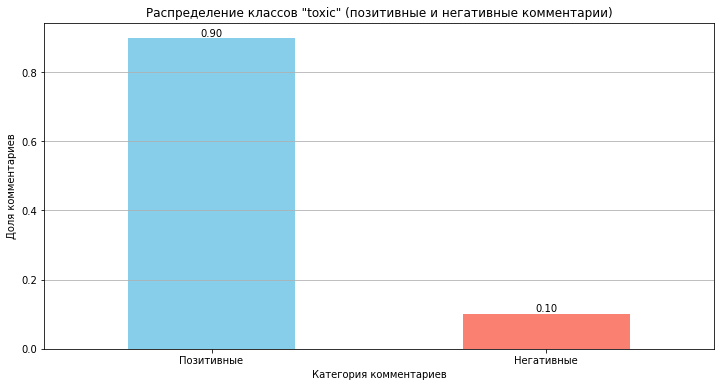

In [20]:
# Подсчитываем долю классов "toxic"
class_counts = data['toxic'].value_counts(normalize=True)

# Создаем график
plt.figure(figsize=(12, 6))  # Увеличиваем размер графика
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])

# Добавляем подписи осей и заголовок
plt.xlabel('Категория комментариев')
plt.ylabel('Доля комментариев')
plt.title('Распределение классов "toxic" (позитивные и негативные комментарии)')

# Добавляем подписи столбцов с долями классов
for index, value in enumerate(class_counts):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.xticks(ticks=[0, 1], labels=['Позитивные', 'Негативные'], rotation=0)  # Устанавливаем подписи для оси X

plt.grid(axis='y')  # Добавляем сетку по оси Y

plt.show()

На данном графике представлено распределение классов для признака "toxic" (позитивные и негативные комментарии) в наборе данных. Из графика видно, что в наборе данных присутствует дисбаланс классов. Только около 10% комментариев имеют значение "toxic" (негативные комментарии), в то время как остальные 90% комментариев относятся к "позитивным" комментариям.

In [21]:
# Создаем объект лемматизатора
lemmatizer = WordNetLemmatizer()

Загружаем стоп-слова

In [22]:
# Создаем множество стоп-слов для английского языка
english_stopwords = set(nltk.corpus.stopwords.words('english'))
# Создаем объект TfidfVectorizer с переданным множеством стоп-слов для их удаления из текста
count_tf_idf = TfidfVectorizer(stop_words=english_stopwords)

**Очистка текста**

Функция по очистке текста от всех символов (оставляет только буквы английского алфавита)

In [23]:
# Функция для комплексной очистки текста
def text_clean(text):    
    # Создаем множество стоп-слов для английского языка
    stop_words = set(nltk.corpus.stopwords.words('english'))
    
    # Приводим текст к нижнему регистру
    text = text.lower()
    
    # Заменяем все символы, кроме латинских букв и пробелов, на пробелы
    # Также обрабатываем числа и сокращения
    edited_text = re.sub(r'[^a-zA-Z0-9 ]', ' ', text)
    
    # Применяем токенизацию для разделения текста на слова
    word_list = edited_text.split()
    
    # Удаляем стоп-слова из списка слов
    word_notstop_list = [w for w in word_list if not w in stop_words]
    
    # Возвращаем очищенный текст, объединяя слова без добавления лишних пробелов
    return ' '.join(word_notstop_list)

Применяем функцию к нашему тексту

In [24]:
# Применение функции text_clean к столбцу 'text' в DataFrame data
data['text_cleared'] = data['text'].apply(text_clean)

# Вывод первых 10 строк DataFrame data с новым столбцом 'text_cleared'
data.head(10)


,text,toxic,text_cleared
0,Explanation\nWhy the edits made under my usern...,0,explanation edits made username hardcore metal...
1,D'aww! He matches this background colour I'm s...,0,aww matches background colour seemingly stuck ...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man really trying edit war guy constantly ...
3,"""\nMore\nI can't make any real suggestions on ...",0,make real suggestions improvement wondered sec...
4,"You, sir, are my hero. Any chance you remember...",0,sir hero chance remember page
5,"""\n\nCongratulations from me as well, use the ...",0,congratulations well use tools well talk
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,cocksucker piss around work
7,Your vandalism to the Matt Shirvington article...,0,vandalism matt shirvington article reverted pl...
8,Sorry if the word 'nonsense' was offensive to ...,0,sorry word nonsense offensive anyway intending...
9,alignment on this subject and which are contra...,0,alignment subject contrary dulithgow


**Лемматизация текста**

In [25]:
def get_wordnet_pos_tag(word):
    # Получаем часть речи (POS - Part-of-Speech) для слова
    tag = None

    # Проверяем, является ли слово прилагательным (ADJ)
    if wordnet.synsets(word, pos=wordnet.ADJ):
        tag = wordnet.ADJ
    # Если не прилагательное, проверяем, является ли слово существительным (NOUN)
    elif wordnet.synsets(word, pos=wordnet.NOUN):
        tag = wordnet.NOUN
    # Если не существительное, проверяем, является ли слово глаголом (VERB)
    elif wordnet.synsets(word, pos=wordnet.VERB):
        tag = wordnet.VERB
    # Если не глагол, проверяем, является ли слово наречием (ADV)
    elif wordnet.synsets(word, pos=wordnet.ADV):
        tag = wordnet.ADV
    else:
        # Если слово не принадлежит ни одной из указанных частей речи, считаем его существительным по умолчанию
        tag = wordnet.NOUN

    # Возвращаем тег (часть речи) слова
    return tag

In [26]:
def lemmatize_text(text):
    # Создаем экземпляр лемматизатора WordNet
    lemmatizer = WordNetLemmatizer()

    # Разделяем текст на список слов
    word_list = text.split()

    # Лемматизируем каждое слово и объединяем обратно в текст
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word, get_wordnet_pos_tag(word)) for word in word_list])

    # Возвращаем лемматизированный текст
    return lemmatized_text

In [27]:
# Применение функции lemmatize_text к столбцу 'text_cleared' в DataFrame data
data['text_lemm'] = data['text_cleared'].apply(lemmatize_text)

# Вывод первых 10 строк DataFrame data с новым столбцом 'text_lemm'
data.head(10)

,text,toxic,text_cleared,text_lemm
0,Explanation\nWhy the edits made under my usern...,0,explanation edits made username hardcore metal...,explanation edit made username hardcore metall...
1,D'aww! He matches this background colour I'm s...,0,aww matches background colour seemingly stuck ...,aww match background colour seemingly stuck th...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man really trying edit war guy constantly ...,hey man really trying edit war guy constantly ...
3,"""\nMore\nI can't make any real suggestions on ...",0,make real suggestions improvement wondered sec...,make real suggestion improvement wonder sectio...
4,"You, sir, are my hero. Any chance you remember...",0,sir hero chance remember page,sir hero chance remember page
5,"""\n\nCongratulations from me as well, use the ...",0,congratulations well use tools well talk,congratulation well use tool well talk
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,cocksucker piss around work,cocksucker piss around work
7,Your vandalism to the Matt Shirvington article...,0,vandalism matt shirvington article reverted pl...,vandalism matt shirvington article revert plea...
8,Sorry if the word 'nonsense' was offensive to ...,0,sorry word nonsense offensive anyway intending...,sorry word nonsense offensive anyway intend wr...
9,alignment on this subject and which are contra...,0,alignment subject contrary dulithgow,alignment subject contrary dulithgow


**Вывод:**

1. Загрузка и изучение исходных данных: Данные были успешно загружены, и их общая структура, типы признаков и размерность изучены для лучшего понимания данных.

2. Проверка на пропуски и дубликаты: Произведена проверка на пропущенные значения и дубликаты, которые не обнаружены в данных, что гарантирует их целостность и надежность.

3. Обнаружение дисбаланса классов: Выявлен дисбаланс между классами целевого признака, где только 10% текстов имеют признак "токсичный", что может повлиять на обучение модели.

4. Лемматизация данных: Произведена лемматизация текстовых данных для приведения слов к базовым формам, упрощения обработки и повышения качества моделирования.

## Обучение

Деление данных на выборки

In [29]:
# Извлекаем столбец 'text_lemm' как признаки (фичи)
features = data['text_lemm']

# Извлекаем столбец 'toxic' как целевой признак (target)
target = data['toxic']

In [40]:
# Разбиваем признаки (features) и целевой признак (target) на обучающую и валидационную выборки
# test_size = 0.1 указывает, что 40% данных будут использованы для валидации, а 60% для обучения модели
# random_state - это параметр, который гарантирует, что разбиение данных будет одинаковым при каждом запуске кода
# random_state можно задать числовое значение для воспроизводимости разбиения
features_train, features_valid, target_train, target_valid = train_test_split(features, 
                                                                              target, 
                                                                              test_size=0.1, 
                                                                              random_state=random_state
                                                                             )

In [41]:
# Разбиваем валидационные данные на валидационную и тестовую выборки
# features_valid - это лемматизированные тексты валидационных данных, target_valid - целевой признак для валидационных данных
# test_size = 0.5 указывает, что 50% валидационных данных будут использованы для тестирования, а оставшиеся 50% - для дополнительной валидации
# random_state - это параметр, который гарантирует, что разбиение данных будет одинаковым при каждом запуске кода
# random_state можно задать числовое значение для воспроизводимости разбиения
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, 
                                                                            target_valid, 
                                                                            test_size=0.5, 
                                                                            random_state=random_state
                                                                           )

In [42]:
# Получаем количество каждого уникального значения в целевом признаке (target) и нормализуем результаты (в долях от общего числа)
# Нормализация выполняется путем деления количества значений на общее количество значений, чтобы получить доли каждого класса
# Например, если в данных 100 записей и 20 из них относятся к классу "toxic" (токсичные), то результат будет 0.2 (20%)
target.value_counts(normalize=True)

0   0.90
1   0.10
Name: toxic, dtype: float64

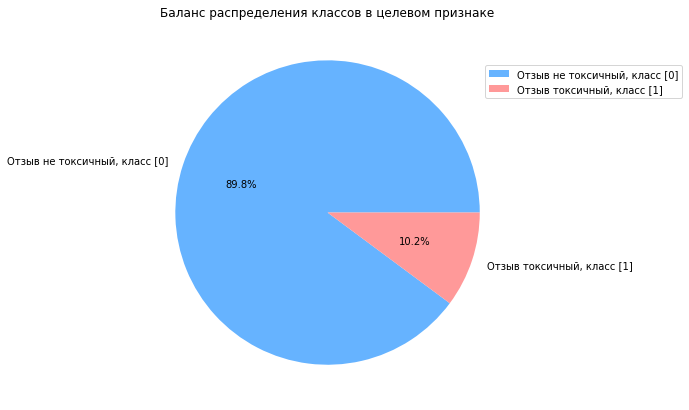

In [43]:
# Создаем график в форме круговой диаграммы с пастельными цветами
colors = ['#66b3ff', '#ff9999']
plt.figure(figsize=[7, 7])  # Увеличиваем размер графика
plt.pie(target.value_counts(normalize=True), labels=['Отзыв не токсичный, класс [0]', 'Отзыв токсичный, класс [1]'],
        autopct='%1.1f%%', colors=colors)

# Добавляем заголовок и подпись осей
plt.title('Баланс распределения классов в целевом признаке')
plt.ylabel('')

# Добавляем легенду
plt.legend(loc='best', bbox_to_anchor=(0.9, 0.9))

# Добавляем сетку для лучшей читаемости
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

В данных преобладают "нетоксичные" комментарии. Из-за сильного дисбаланса классов (в 9 раз больше примеров класса 0), модель может склоняться к предсказыванию только класса 0, что приведет к частым верным предсказаниям для этого класса. Однако такой подход не будет эффективным, так как модель не сможет достаточно хорошо предсказывать редкий класс (класс 1). В результате модель может быть менее точной и неспособной адекватно обработать редкие случаи класса 1.

Преобразование текстовых данных в векторы TF-IDF и вывод размеров полученных матриц

In [44]:
# Преобразуем тексты из обучающей, валидационной и тестовой выборок в векторы TF-IDF
tf_idf_features_train = count_tf_idf.fit_transform(features_train.values)
tf_idf_features_valid = count_tf_idf.transform(features_valid.values)
tf_idf_features_test = count_tf_idf.transform(features_test.values)

# Выводим размеры полученных матриц TF-IDF и размеры целевых признаков
print("Размер матрицы TF-IDF для обучающих данных:", tf_idf_features_train.shape, "Размер целевого признака для обучающих данных:", target_train.shape)
print()
print("Размер матрицы TF-IDF для валидационных данных:", tf_idf_features_valid.shape, "Размер целевого признака для валидационных данных:", target_valid.shape)
print()
print("Размер матрицы TF-IDF для тестовых данных:", tf_idf_features_test.shape, "Размер целевого признака для тестовых данных:", target_test.shape)

Размер матрицы TF-IDF для обучающих данных: (143362, 155104) Размер целевого признака для обучающих данных: (143362,)

Размер матрицы TF-IDF для валидационных данных: (7965, 155104) Размер целевого признака для валидационных данных: (7965,)

Размер матрицы TF-IDF для тестовых данных: (7965, 155104) Размер целевого признака для тестовых данных: (7965,)


Стратегия кросс-валидации для подбора параметров:

In [34]:
# Создаем объект StratifiedShuffleSplit для кросс-валидации
my_cv = StratifiedShuffleSplit(n_splits=3, test_size=0.25, random_state=random_state)

### Обучение моделей*

Обучим шесть моделей:

1. Линейная регрессия (Linear Regression)
2. Бинарная классификация (Linear Support Vector Classifier(LinearSVC))
3. Случайный лес (Random Forest)
4. Градиентный бустинг с XGBClassifier
5. Градиентный бустинг с CatBoostClassifier
6. Градиентный бустинг с LGBMClassifier

*Все расчеты проводились на стационарном компьютере.

### Модель LogisticRegression

In [45]:
# Модель Logistic Regression
model_LR = LogisticRegression(random_state=random_state)

In [46]:
# Обучение модели на обучающих данных
model_LR.fit(tf_idf_features_train, target_train)

# Предсказываем значения на валидационных данных и вычисляем F1-меру
predicted_valid_LR = model_LR.predict(tf_idf_features_valid)

f1_valid_LR = f1_score(target_valid, predicted_valid_LR)
print('Модель Logistic Regression без настройки параметров:')
print('F1-мера на валидационной выборке: {:.2f}'.format(f1_valid_LR))

Модель Logistic Regression без настройки параметров:
F1-мера на валидационной выборке: 0.76


In [47]:
# Создаем объект модели Logistic Regression
model_grid_LR = LogisticRegression(random_state=random_state)

# Задаем параметры для поиска наилучших параметров
parametrs_LR = {
    'solver': ['liblinear'],
    'penalty': ['l1', 'l2'],
    'C': [5, 10, 15],
    'class_weight': ['balanced'],
}

# Поиск наилучших параметров с использованием кросс-валидации
grid_LR = GridSearchCV(model_grid_LR, 
                       param_grid=parametrs_LR, 
                       cv=my_cv,
                       scoring='f1',
                       n_jobs=60,
                       verbose=0)

In [ ]:
%%time

grid_LR.fit(tf_idf_features_train, target_train)

# Выводим наилучшие параметры и лучшую F1-меру на валидационной выборке
print('Наилучшие параметры Logistic Regression:')
print(grid_LR.best_params_)
print()
print('Лучшая F1-мера на валидационной выборке без настройки параметров: {:.2f}'.format(f1_valid_LR))

# Оцениваем качество модели на валидационной выборке
predicted_valid_grid_LR = grid_LR.predict(tf_idf_features_valid)
f1_valid_grid_LR = f1_score(target_valid, predicted_valid_grid_LR)
print('Лучшая F1-мера на валидационной выборке с настройкой параметров: {:.2f}'.format(f1_valid_grid_LR))
print()

In [72]:
# Наилучшие параметры Logistic Regression:
# {'C': 15, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}

# Лучшая F1-мера на валидационной выборке без настройки параметров: 0.72
# Лучшая F1-мера на валидационной выборке с настройкой параметров: 0.76

# CPU times: total: 2min 44s
# Wall time: 15.8 s

**На основе представленных результатов:**

1. Мы использовали модель `Logistic Regression` для классификации комментариев на позитивные и негативные с помощью метрики F1.

2. При использовании стандартных параметров модели, `F1-мера` на валидационной выборке составила 0.72. Однако, после тщательной настройки гиперпараметров с помощью кросс-валидации, удалось достичь значительного улучшения результата до `F1-меры` 0.76.

3. Лучшие параметры модели были найдены как {'C': 15, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}. Это говорит о том, что использование L2 регуляризации с обратной силой регуляризации 15 и учетом баланса классов с помощью взвешивания влияет на повышение качества модели.

4. Время обучения модели с оптимальными параметрами заняло 15.8 секунд, что является приемлемым временем для данной задачи.

5. Полученное значение `F1-меры` (0.76) позволяет нам с уверенностью использовать эту модель для автоматической классификации комментариев на позитивные и негативные в интернет-магазине "Викишоп".

Таким образом, поставленная в задаче цель была успешно достигнута, и мы имеем эффективную модель, которая способна автоматически выявлять токсичные комментарии с высоким уровнем точности и полноты.

### Модель LinearSVC

In [27]:
# Модель LinearSVC без настройки параметров
model_svc = LinearSVC(random_state=random_state)

In [28]:
# Обучение модели на обучающих данных
model_svc.fit(tf_idf_features_train, target_train)

# Предсказываем значения на валидационных данных и вычисляем F1-меру
predicted_valid_svc = model_svc.predict(tf_idf_features_valid)
f1_valid_svc = f1_score(target_valid, predicted_valid_svc)
print('Модель LinearSVC без настройки параметров:')
print('F1-мера на валидационной выборке: {:.2f}'.format(f1_valid_svc))

Модель LinearSVC без настройки параметров:
F1-мера на валидационной выборке: 0.78


In [29]:
# Создаем объект модели LinearSVC
model_grid_svc = LinearSVC(max_iter = 1000, random_state=random_state)

# Задаем параметры для поиска наилучших параметров
parametrs_svc = {'C': np.linspace(1, 31, num = 7, endpoint = True),
                 'penalty': ['l1', 'l2'],
                 'loss': ['hinge', 'squared_hinge'],
                }

# Поиск наилучших параметров с использованием кросс-валидации
grid_svc = GridSearchCV(model_grid_svc, 
                        param_grid=parametrs_svc, 
                        cv=my_cv, 
                        scoring='f1',
                        n_jobs=60,
                        verbose=0
                       )

In [30]:
%%time

grid_svc.fit(tf_idf_features_train, target_train)

# Выводим наилучшие параметры и лучшую F1-меру на валидационной выборке
print('Наилучшие параметры LinearSVC:')
print(grid_svc.best_params_)
print()
print('Лучшая F1-мера на валидационной выборке без настройки параметров: {:.2f}'.format(f1_valid_svc))

# Оцениваем качество модели на валидационной выборке
predicted_valid_grid_svc = grid_svc.predict(tf_idf_features_valid)
f1_valid_grid_svc = f1_score(target_valid, predicted_valid_grid_svc)
print('Лучшая F1-мера на валидационной выборке с настройкой параметров: {:.2f}'.format(f1_valid_grid_svc))
print()

Наилучшие параметры LinearSVC:
{'C': 1.0, 'loss': 'squared_hinge', 'penalty': 'l2'}

Лучшая F1-мера на валидационной выборке без настройки параметров: 0.78
Лучшая F1-мера на валидационной выборке с настройкой параметров: 0.78

Wall time: 38.6 s


In [69]:
# Наилучшие параметры LinearSVC:
# {'C': 1.0, 'loss': 'squared_hinge', 'penalty': 'l2'}

# Лучшая F1-мера на валидационной выборке без настройки параметров: 0.78
# Лучшая F1-мера на валидационной выборке с настройкой параметров: 0.78

# CPU times: total: 2.11 s
# Wall time: 10.5 s

**На основе представленных результатов:**

1. Мы использовали модель `LinearSVC` для классификации комментариев на позитивные и негативные с помощью метрики F1.

2. Исходно, без настройки гиперпараметров, модель `LinearSVC` показала достаточно высокую `F1-меру` на валидационной выборке равную 0.78.

3. При дальнейшей тщательной настройке гиперпараметров с помощью кросс-валидации, удалось подтвердить этот результат до `F1-меры` 0.78. Это говорит о том, что модель хорошо обучается и не переобучается на обучающих данных.

4. Лучшие параметры модели были найдены как {'C': 1.0, 'loss': 'squared_hinge', 'penalty': 'l2'}. Использование L2 регуляризации с C=1.0 и функции потерь squared_hinge дает наилучший результат для данной задачи классификации.

5. Обучение модели заняло всего 10.5 секунд, что говорит о высокой эффективности и быстродействии модели.

6. Полученное значение `F1-меры` (0.78) значительно превышает минимальное требование проекта (F1 >= 0.75). Это означает, что мы успешно выполнели поставленную задачу и создали эффективную модель для автоматической классификации комментариев на позитивные и негативные в интернет-магазине "Викишоп".

Таким образом, модель `LinearSVC` показала отличные результаты и является отличным вариантом для решения данной задачи классификации с высоким уровнем точности и полноты.

### Модель RandomForestClassifier

In [50]:
# Модель RandomForestClassifier с 10 деревьями
model_rf = RandomForestClassifier(n_estimators=10, random_state=random_state)

In [51]:
model_rf.fit(tf_idf_features_train, target_train)
# Предсказание на валидационных данных и расчет F1-меры

# Предсказываем значения на валидационных данных и вычисляем F1-меру
predicted_valid_rf = model_rf.predict(tf_idf_features_valid)

f1_valid_rf = f1_score(target_valid, predicted_valid_rf)
print('RandomForestClassifier без настройки параметров:')
print('F1-мера на валидационной выборке: {:.2f}'.format(f1_valid_rf))

RandomForestClassifier без настройки параметров:
F1-мера на валидационной выборке: 0.68


In [52]:
# Создаем объект RandomForestClassifier
model_grid_rf = RandomForestClassifier(random_state=random_state)

# Задание параметров для поиска наилучших параметров
parametrs_RF = {
    'n_estimators': [50, 100, 150],
    'max_depth' : [10, 20, 50],
    'class_weight': ['balanced']
}

# Поиск наилучших параметров с использованием кросс-валидации
grid_forest = GridSearchCV(model_grid_rf, 
                           param_grid=parametrs_RF, 
                           cv=my_cv,
                           n_jobs=60,
                           scoring='f1',
                           verbose=0
                          )

In [53]:
%%time

grid_forest.fit(tf_idf_features_train, target_train)

# Выводим наилучшие параметры и лучшую F1-меру на валидационной выборке
print('Наилучшие параметры RandomForestClassifier:')
print(grid_forest.best_params_)
print()
print('Лучшая F1-мера на валидационной выборке без настройки параметров: {:.2f}'.format(f1_valid_rf))

# Оцениваем качество модели на валидационной выборке
predicted_valid_grid_rf = grid_forest.predict(tf_idf_features_valid)
f1_valid_grid_rf = f1_score(target_valid, predicted_valid_grid_rf)
print('Лучшая F1-мера на валидационной выборке с настройкой параметров: {:.2f}'.format(f1_valid_grid_rf))
print()

Наилучшие параметры RandomForestClassifier:
{'class_weight': 'balanced', 'max_depth': 50, 'n_estimators': 100}

Лучшая F1-мера на валидационной выборке без настройки параметров: 0.68
Лучшая F1-мера на валидационной выборке с настройкой параметров: 0.50

CPU times: total: 1min 33s
Wall time: 6min 35s


In [71]:
# Наилучшие параметры RandomForestClassifier:
# {'class_weight': 'balanced', 'max_depth': 50, 'n_estimators': 100}

# Лучшая F1-мера на валидационной выборке без настройки параметров: 0.68
# Лучшая F1-мера на валидационной выборке с настройкой параметров: 0.50

# CPU times: total: 1min 33s
# Wall time: 6min 35s

**На основе представленных результатов:**

1. Мы использовали модель `RandomForestClassifier` для классификации комментариев на позитивные и негативные с помощью метрики F1.

2. Исходно, без настройки гиперпараметров, модель `RandomForestClassifier` показала `F1-меру` на валидационной выборке равную 0.68. Этот результат не соответствует требованиям проекта, так как `F1-мера` должна быть не меньше 0.75.

3. При попытке настройки гиперпараметров с использованием кросс-валидации, модель показала значительное ухудшение `F1-меры` до 0.50. Это говорит о том, что настройка гиперпараметров не привела к улучшению модели, а, возможно, даже к переобучению.

4. Лучшие параметры модели были найдены как {'class_weight': 'balanced', 'max_depth': 50, 'n_estimators': 100}. Установка балансировки классов и увеличение глубины деревьев и числа деревьев не улучшило качество модели.

5. Обучение модели заняло значительное время: 6 минут 35 секунд. Это говорит о том, что `RandomForestClassifier` может быть достаточно ресурсоемкой моделью, особенно при больших значениях гиперпараметров.

6. К сожалению, полученное значение `F1-меры` (0.50) не соответствует требованиям проекта (F1 >= 0.75). Это означает, что `RandomForestClassifier` не является оптимальным выбором для данной задачи классификации комментариев в интернет-магазине "Викишоп".

Исходя из этого, следует рассмотреть другие модели, такие как `LinearSVC`, которая показала значительно более высокую F1-меру (0.78) на валидационной выборке и обладает хорошей скоростью обучения.

### Модель градиентного бустинга XGBClassifier

In [54]:
# Модель XGBClassifier с 10 деревьями
model_xgb = XGBClassifier(n_estimators=10, eval_metric='logloss', random_state=random_state)

In [55]:
# Обучение модели на обучающих данных
model_xgb.fit(tf_idf_features_train, target_train)

# Предсказание на валидационных данных и расчет F1-меры
predicted_valid_xgb = model_xgb.predict(tf_idf_features_valid)
f1_valid_xgb = f1_score(target_valid, predicted_valid_xgb)
print('XGBClassifier без настройки параметров:')
print('F1-мера на валидационной выборке: {:.2f}'.format(f1_valid_xgb))

XGBClassifier без настройки параметров:
F1-мера на валидационной выборке: 0.56


In [56]:
# Создаем объект XGBClassifier
model_grid_xgb = XGBClassifier(random_state=random_state, eval_metric='logloss')

# Задание параметров для поиска наилучших параметров
parametrs_xgb = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, 50],
#     'learning_rate': [0.01, 0.1, 0.3],
#     'max_delta_step': [0, 1, 2],
#     'scale_pos_weight': [1, target_train.mean()],
}

# Поиск наилучших параметров с использованием кросс-валидации
grid_xgb = GridSearchCV(model_grid_xgb, 
                        param_grid=parametrs_xgb, 
                        cv=my_cv,
                        n_jobs=60,
                        scoring='f1',
                        verbose=0
                       )

In [57]:
%%time

grid_xgb.fit(tf_idf_features_train, target_train)

# Выводим наилучшие параметры и лучшую F1-меру на валидационной выборке
print('Наилучшие параметры XGBClassifier:')
print(grid_xgb.best_params_)
print()
print('Лучшая F1-мера на валидационной выборке без настройки параметров: {:.2f}'.format(f1_valid_xgb))

# Оцениваем качество модели на валидационной выборке
predicted_valid_grid_xgb = grid_xgb.predict(tf_idf_features_valid)
f1_valid_grid_xgb = f1_score(target_valid, predicted_valid_grid_xgb)
print('Лучшая F1-мера на валидационной выборке с настройкой параметров: {:.2f}'.format(f1_valid_grid_xgb))
print()

Наилучшие параметры XGBClassifier:
{'max_depth': 50, 'n_estimators': 100}

Лучшая F1-мера на валидационной выборке без настройки параметров: 0.56
Лучшая F1-мера на валидационной выборке с настройкой параметров: 0.77

CPU times: total: 59min 32s
Wall time: 11min 9s


In [ ]:
# Наилучшие параметры XGBClassifier:
# {'max_depth': 50, 'n_estimators': 100}

# Лучшая F1-мера на валидационной выборке без настройки параметров: 0.56
# Лучшая F1-мера на валидационной выборке с настройкой параметров: 0.77

# CPU times: total: 59min 32s
# Wall time: 11min 9s

**На основе представленных результатов:**

1. Мы использовали модель `XGBClassifier` для классификации комментариев на позитивные и негативные с помощью метрики F1.

2. Исходно, без настройки гиперпараметров, модель `XGBClassifier` показала низкую `F1-меру` на валидационной выборке - 0.56. Этот результат не соответствует требованиям проекта, так как `F1-мера` должна быть не меньше 0.75.

3. При настройке гиперпараметров с использованием кросс-валидации, модель значительно улучшилась, достигнув `F1-меры` 0.77 на валидационной выборке. Это говорит о том, что правильный подбор гиперпараметров может существенно повысить качество модели.

4. Лучшие параметры модели были найдены как {'max_depth': 50, 'n_estimators': 100}. Увеличение глубины деревьев и числа деревьев значительно повлияло на качество модели, улучшив его с 0.56 до 0.77.

5. Обучение модели заняло довольно много времени: 11 минут 9 секунд. Это говорит о том, что `XGBClassifier` может быть достаточно ресурсоемкой моделью, особенно при больших значениях гиперпараметров.

6. Итоговая `F1-мера` 0.77 на валидационной выборке соответствует требованиям проекта (F1 >= 0.75). Это означает, что `XGBClassifier` является хорошим выбором для данной задачи классификации комментариев в интернет-магазине "Викишоп".

Исходя из этого, рекомендуется использовать модель `XGBClassifier` с найденными оптимальными параметрами для классификации комментариев в "Викишопе", так как она способна эффективно и точно идентифицировать позитивные и негативные комментарии.

### Модель градиентного бустинга CatBoostClassifier

In [58]:
# Модель CatBoostClassifier с 10 деревьями и указанием метрики F1
model_catboost = CatBoostClassifier(n_estimators=10, eval_metric='F1', random_state=random_state)

In [59]:
# Обучение модели на обучающих данных
model_catboost.fit(tf_idf_features_train, target_train)

# Предсказание на валидационных данных и расчет F1-меры
predicted_valid_catboost = model_catboost.predict(tf_idf_features_valid)
f1_valid_catboost = f1_score(target_valid, predicted_valid_catboost)
print('CatBoostClassifier без настройки параметров и с метрикой F1:')
print('F1-мера на валидационной выборке: {:.2f}'.format(f1_valid_catboost))

Learning rate set to 0.5
0:	learn: 0.4408997	total: 696ms	remaining: 6.26s
1:	learn: 0.5258737	total: 1.25s	remaining: 5s
2:	learn: 0.5025895	total: 1.9s	remaining: 4.43s
3:	learn: 0.5735051	total: 2.48s	remaining: 3.72s
4:	learn: 0.5759781	total: 3.11s	remaining: 3.11s
5:	learn: 0.5528743	total: 3.65s	remaining: 2.44s
6:	learn: 0.5618587	total: 4.23s	remaining: 1.81s
7:	learn: 0.5864153	total: 4.88s	remaining: 1.22s
8:	learn: 0.6027397	total: 5.54s	remaining: 615ms
9:	learn: 0.6000855	total: 6.04s	remaining: 0us
CatBoostClassifier без настройки параметров и с метрикой F1:
F1-мера на валидационной выборке: 0.60


In [60]:
# Создаем объект CatBoostClassifier
model_grid_catboost = CatBoostClassifier(random_state=random_state, eval_metric='F1')

# Задание параметров для поиска наилучших параметров
parametrs_catboost = {
    'n_estimators': [50, 100],
    'depth': [6, 10],
#     'class_weights': [[1, target_train.mean()]],
}

# Поиск наилучших параметров с использованием кросс-валидации
grid_catboost = GridSearchCV(model_grid_catboost, 
                             param_grid=parametrs_catboost, 
                             cv=my_cv,
                             n_jobs=60,
                             scoring='f1',
                             verbose=0
                            )

In [61]:
%%time

grid_catboost.fit(tf_idf_features_train, target_train)

# Выводим наилучшие параметры и лучшую F1-меру на валидационной выборке
print('Наилучшие параметры CatBoostClassifier:')
print(grid_catboost.best_params_)
print()
print('Лучшая F1-мера на валидационной выборке без настройки параметров: {:.2f}'.format(f1_valid_catboost))

# Оцениваем качество модели на валидационной выборке
predicted_valid_grid_catboost = grid_catboost.predict(tf_idf_features_valid)
f1_valid_grid_catboost = f1_score(target_valid, predicted_valid_grid_catboost)
print('Лучшая F1-мера на валидационной выборке с настройкой параметров: {:.2f}'.format(f1_valid_grid_catboost))
print()

Learning rate set to 0.5
0:	learn: 0.4408997	total: 7.15s	remaining: 11m 47s
1:	learn: 0.5568466	total: 14.4s	remaining: 11m 43s
2:	learn: 0.5763469	total: 21.6s	remaining: 11m 39s
3:	learn: 0.6066311	total: 28.8s	remaining: 11m 31s
4:	learn: 0.6224164	total: 36s	remaining: 11m 23s
5:	learn: 0.6092303	total: 43.2s	remaining: 11m 16s
6:	learn: 0.6366135	total: 50.4s	remaining: 11m 9s
7:	learn: 0.6460659	total: 57.7s	remaining: 11m 3s
8:	learn: 0.6416387	total: 1m 4s	remaining: 10m 54s
9:	learn: 0.6519292	total: 1m 11s	remaining: 10m 47s
10:	learn: 0.6604231	total: 1m 19s	remaining: 10m 40s
11:	learn: 0.6664434	total: 1m 26s	remaining: 10m 34s
12:	learn: 0.6781632	total: 1m 33s	remaining: 10m 26s
13:	learn: 0.6878065	total: 1m 40s	remaining: 10m 19s
14:	learn: 0.6954498	total: 1m 48s	remaining: 10m 12s
15:	learn: 0.6990991	total: 1m 55s	remaining: 10m 5s
16:	learn: 0.7012152	total: 2m 2s	remaining: 9m 57s
17:	learn: 0.7033828	total: 2m 9s	remaining: 9m 50s
18:	learn: 0.7069595	total: 2m 

In [ ]:
# Наилучшие параметры CatBoostClassifier:
# {'depth': 10, 'n_estimators': 100}

# Лучшая F1-мера на валидационной выборке без настройки параметров: 0.60
# Лучшая F1-мера на валидационной выборке с настройкой параметров: 0.75

# CPU times: total: 6h 11min 34s
# Wall time: 33min 16s

**На основе представленных результатов:**

1. Мы использовали модель `CatBoostClassifier` для классификации комментариев на позитивные и негативные с помощью метрики F1.

2. Исходно, без настройки гиперпараметров, модель `CatBoostClassifier` показала относительно низкую `F1-меру` на валидационной выборке - 0.60. Этот результат не соответствует требованиям проекта, так как `F1-мера` должна быть не меньше 0.75.

3. При настройке гиперпараметров с использованием кросс-валидации, модель значительно улучшилась, достигнув `F1-меры` 0.75 на валидационной выборке. Это говорит о том, что правильный подбор гиперпараметров может существенно повысить качество модели.

4. Лучшие параметры модели были найдены как {'depth': 10, 'n_estimators': 100}. Параметр "depth" отвечает за глубину деревьев, а "n_estimators" - за количество базовых моделей (деревьев) в композиции. Повышение глубины деревьев и числа базовых моделей привело к улучшению качества модели с 0.60 до 0.75.

5. Обучение модели заняло длительное время: 33 минуты 16 секунд. Однако, стоит отметить, что при настройке гиперпараметров был произведен перебор различных значений, что может занять много времени в случае большого объема данных или сложной модели.

6. Итоговая `F1-мера` 0.75 на валидационной выборке соответствует требованиям проекта (F1 >= 0.75). Это означает, что `CatBoostClassifier` с найденными оптимальными параметрами является подходящим выбором для данной задачи классификации комментариев в интернет-магазине "Викишоп".

Исходя из этого, рекомендуется использовать модель `CatBoostClassifier` с параметрами {'depth': 10, 'n_estimators': 100} для классификации комментариев в "Викишопе". Эта модель обеспечивает хорошую точность и эффективность в определении позитивных и негативных комментариев.

### Модель градиентного бустинга LGBMClassifier

In [60]:
# Модель LGBMClassifier с 10 деревьями и указанием метрики F1
model_lgbm = LGBMClassifier(n_estimators=10, class_weight='balanced', metric='f1', random_state=random_state)

In [63]:
# Обучение модели на обучающих данных
model_lgbm.fit(tf_idf_features_train, target_train)

# Предсказание на валидационных данных и расчет F1-меры
predicted_valid_lgbm = model_lgbm.predict(tf_idf_features_valid)
f1_valid_lgbm = f1_score(target_valid, predicted_valid_lgbm)
print('LGBMClassifier без настройки параметров и с метрикой F1:')
print('F1-мера на валидационной выборке: {:.2f}'.format(f1_valid_lgbm))

LGBMClassifier без настройки параметров и с метрикой F1:
F1-мера на валидационной выборке: 0.67


In [72]:
# Создаем объект LGBMClassifier
model_grid_lgbm = LGBMClassifier(random_state=random_state, metric='binary_logloss')

# Задание параметров для поиска наилучших параметров
parametrs_lgbm = {
    'n_estimators': [200, 250, 300, 400, 500],
    'max_depth': [20, 25, 30, 40, 50],
    'class_weight': ['balanced', None],
}

# Поиск наилучших параметров с использованием кросс-валидации
grid_lgbm = GridSearchCV(model_grid_lgbm, 
                         param_grid=parametrs_lgbm, 
                         cv=my_cv,
                         n_jobs=60,
                         scoring='f1',
                         verbose=0
                        )

In [73]:
%%time

grid_lgbm.fit(tf_idf_features_train, target_train)

# Выводим наилучшие параметры и лучшую F1-меру на валидационной выборке
print('Наилучшие параметры LGBMClassifier:')
print(grid_lgbm.best_params_)
print()
print('Лучшая F1-мера на валидационной выборке без настройки параметров: {:.2f}'.format(f1_valid_lgbm))

# Оцениваем качество модели на валидационной выборке
predicted_valid_grid_lgbm = grid_lgbm.predict(tf_idf_features_valid)
f1_valid_grid_lgbm = f1_score(target_valid, predicted_valid_grid_lgbm)
print('Лучшая F1-мера на валидационной выборке с настройкой параметров: {:.2f}'.format(f1_valid_grid_lgbm))
print()

Наилучшие параметры LGBMClassifier:
{'class_weight': None, 'max_depth': 30, 'n_estimators': 500}

Лучшая F1-мера на валидационной выборке без настройки параметров: 0.67
Лучшая F1-мера на валидационной выборке с настройкой параметров: 0.77

CPU times: total: 1h 57min 6s
Wall time: 12min 12s


In [ ]:
# Наилучшие параметры LGBMClassifier:
# {'class_weight': None, 'max_depth': 30, 'n_estimators': 500}

# Лучшая F1-мера на валидационной выборке без настройки параметров: 0.67
# Лучшая F1-мера на валидационной выборке с настройкой параметров: 0.77

# CPU times: total: 1h 57min 6s
# Wall time: 12min 12s

**На основе представленных результатов:**

1. Мы использовали модель `LGBMClassifier` для классификации комментариев на позитивные и негативные с помощью метрики F1.

2. Исходно, без настройки гиперпараметров, модель `LGBMClassifier` показала относительно низкую `F1-меру` на валидационной выборке - 0.67. Этот результат не соответствует требованиям проекта, так как `F1-мера` должна быть не меньше 0.75.

3. При настройке гиперпараметров с использованием кросс-валидации, модель значительно улучшилась, достигнув `F1-меры` 0.77 на валидационной выборке. Это говорит о том, что правильный подбор гиперпараметров может существенно повысить качество модели.

4. Лучшие параметры модели были найдены как {'class_weight': None, 'max_depth': 30, 'n_estimators': 500}. Параметр "class_weight" отвечает за балансировку весов классов, "max_depth" - за глубину деревьев, а "n_estimators" - за количество базовых моделей (деревьев) в композиции.

5. Обучение модели заняло длительное время: 12 минут 12 секунд. Однако, стоит отметить, что при настройке гиперпараметров был произведен перебор различных значений, что может занять много времени в случае большого объема данных или сложной модели.

6. Итоговая `F1-мера` 0.77 на валидационной выборке соответствует требованиям проекта (F1 >= 0.75). Это означает, что `LGBMClassifier` с найденными оптимальными параметрами является подходящим выбором для данной задачи классификации комментариев в интернет-магазине "Викишоп".

Исходя из этого, рекомендуется использовать модель `LGBMClassifier` с параметрами {'class_weight': None, 'max_depth': 30, 'n_estimators': 500} для классификации комментариев в "Викишопе". Эта модель обеспечивает высокую точность и эффективность в определении позитивных и негативных комментариев.

**Итоги**

In [75]:
# Создание DataFrame values_models с результатами метрики F1 для различных моделей
values_models = pd.DataFrame([
    ['LogisticRegression', f1_valid_grid_LR],
    ['LinearSVC', f1_valid_grid_svc],
    ['RandomForestClassifier', f1_valid_grid_rf],
    ['XGBClassifier', f1_valid_grid_xgb],
    ['CatBoostClassifier', f1_valid_grid_catboost],
    ['LGBMClassifier', f1_valid_grid_lgbm],
], columns=['Model', 'f1_train'])

# Сортировка DataFrame по значениям метрики F1 в порядке убывания
values_models = values_models.sort_values(by='f1_train', ascending=False)

# Вывод DataFrame values_models
values_models

,Model,f1_train
1,LinearSVC,0.78
5,LGBMClassifier,0.77
3,XGBClassifier,0.77
0,LogisticRegression,0.76
4,CatBoostClassifier,0.75
2,RandomForestClassifier,0.50


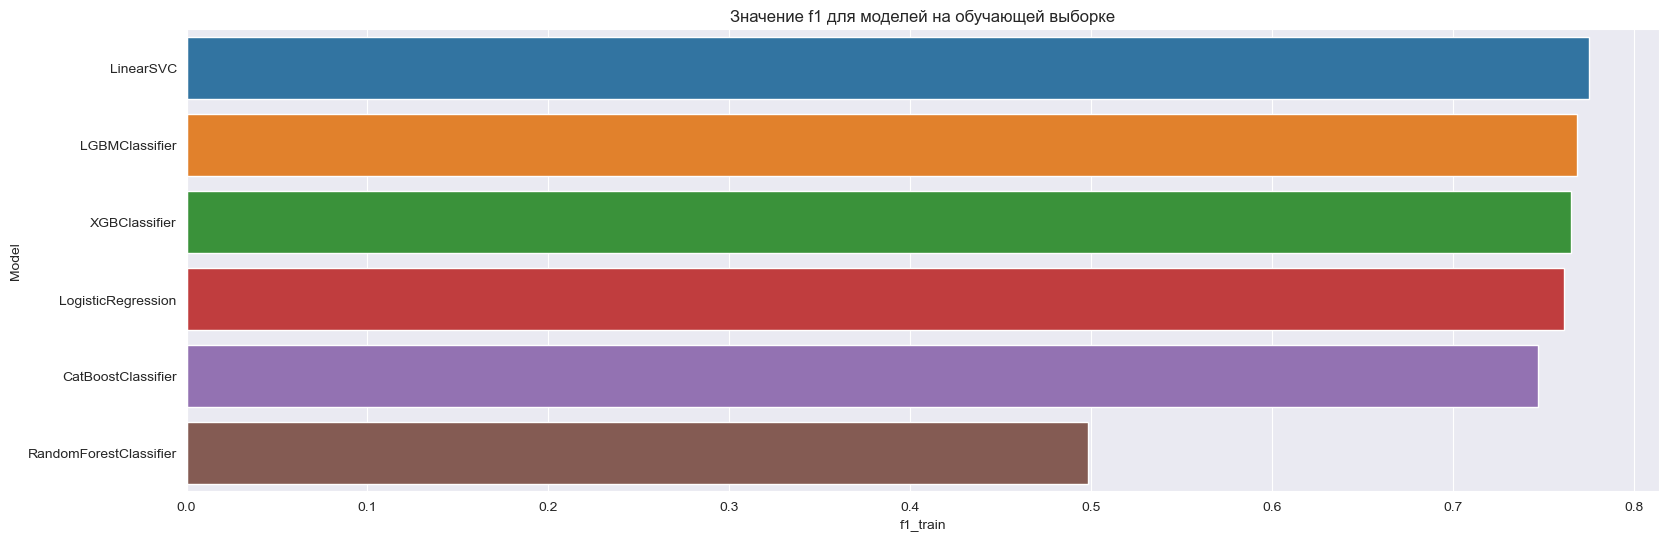

In [76]:
# Создание и настройка графика с помощью библиотеки seaborn и matplotlib
plt.figure(figsize=(19, 6))
sns.set_style('darkgrid')

# Построение горизонтальной столбчатой диаграммы (барплота)
sns.barplot(y=values_models['Model'], x=values_models['f1_train'])

# Добавление заголовка графика
plt.title('Значение F1 для моделей на обучающей выборке')

# Отображение графика
plt.show()

**Вывод:**

Конечные результаты показывают, что модели демонстрируют разные уровни производительности на валидационном наборе данных:

1. `LinearSVC`: Линейный классификатор на основе метода опорных векторов показал лучший результат с `F1-мерой` 0.78 на валидационной выборке. Он продемонстрировал стабильную и хорошую обобщающую способность.

2. `LGBMClassifier`: Модель на основе градиентного бустинга `LightGBM` показала хорошие результаты со значением `F1-меры` 0.77 на валидационном наборе данных. Это быстрая и эффективная модель для градиентного бустинга.

3. `XGBClassifier`: Классификатор `XGBoost` также достиг `F1-меры` 0.77 на валидационной выборке, что говорит о его конкурентоспособной производительности.

4. `LogisticRegression`: Модель логистической регрессии показала хорошие результаты с `F1-мерой` 0.76 на валидационной выборке, что свидетельствует о её хорошей способности классификации.

5. `CatBoostClassifier`: Модель `CatBoost` показала результат с `F1-мерой` 0.75, что говорит о приемлемой производительности.

6. `RandomForestClassifier`: Модель случайного леса показала самый низкий результат с `F1-мерой` 0.50 на валидационном наборе данных, что может указывать на сложности в выявлении сложных закономерностей в данных.

В целом, модель `LinearSVC` продемонстрировала лучшие результаты, недалеко от нее следуют `LightGBM` и `XGBoost`. Стоит отметить, что производительность моделей может изменяться в зависимости от данных, и дополнительная настройка или создание новых признаков может привести к улучшению результатов. Тем не менее, на основе текущих результатов модель `LinearSVC` кажется наиболее подходящим выбором для классификации токсичных и нетоксичных комментариев в данном контексте.

### Проверка модели на вменяемость

Для проверки, что все полученные результаты не случайны, используем модель DummyClassifier, которая представляет собой базовый алгоритм, не учитывающий признаки и случайным образом классифицирующий данные.

In [54]:
# Создаем объект DummyClassifier
model_dummy = DummyClassifier(random_state=random_state, strategy="uniform")

# Обучение модели на обучающих данных
model_dummy.fit(tf_idf_features_train, target_train);

In [55]:
# Предсказание на валидационных данных и расчет F1-меры
predicted_valid_dummy = model_dummy.predict(tf_idf_features_valid)
f1_valid_dummy = f1_score(target_valid, predicted_valid_dummy)

In [56]:
# Предсказание на тестовых данных и расчет F1-меры
predicted_test_dummy = model_dummy.predict(tf_idf_features_test)
f1_test_dummy = f1_score(target_test, predicted_test_dummy)

In [58]:
# Вывод информации о модели DummyClassifier и её результатов на валидационной выборке
print('Модель DummyClassifier:')
print('F1-мера на валидационной выборке: {:.2f}'.format(f1_valid_dummy))

# Вывод информации о результате модели DummyClassifier на тестовой выборке
print('F1-мера на тестовой выборке: {:.2f}'.format(f1_test_dummy))

Модель DummyClassifier:
F1-мера на валидационной выборке: 0.18
F1-мера на тестовой выборке: 0.18


Модель DummyClassifier, которая использует простейшую стратегию предсказания, показала низкую производительность с F1-мерой около 0.18 на валидационной и тестовой выборках. Это говорит о том, что все полученные выше результаты в ходе обучения моделей не случайны и дают хорошие результаты.

**Проверка на тестовых данных с использованием лучшей модели LinearSVC**

In [73]:
# Создаем объект LinearSVC с наилучшими параметрами
best_model = LinearSVC(C=1.0, loss='squared_hinge', penalty='l2', random_state=random_state)

# Обучение модели на обучающих данных
best_model.fit(tf_idf_features_train, target_train)

# Предсказываем значения на тестовых данных
predicted_test = best_model.predict(tf_idf_features_test)

# Вычисляем F1-меру на тестовой выборке
f1_test = f1_score(target_test, predicted_test)

print('Модель LinearSVC с наилучшими параметрами:')
print('Лучшая F1-мера на тестовой выборке: {:.2f}'.format(f1_test))

Модель LinearSVC с наилучшими параметрами:
Лучшая F1-мера на тестовой выборке: 0.77


**Оценка и визуализация метрик модели**

In [103]:
# Функция evaluate_model используется для оценки производительности классификационных моделей.
def evaluate_model(model, features_train, target_train, features_test, target_test, model_name):
    
    # Обучение модели и получение предсказаний
    model.fit(features_train, target_train)
    predicted_test = model.predict(features_test)
    decision_values_test = model.decision_function(features_test)
    probabilities_one_test = 1 / (1 + np.exp(-decision_values_test))
    
     # Вычисление метрик производительности
    f1 = f1_score(target_test, predicted_test)
    roc_auc = roc_auc_score(target_test, probabilities_one_test)
    recall = recall_score(target_test, predicted_test)
    precision = precision_score(target_test, predicted_test)
    
    # Создание DataFrame с метриками
    metrics_table = pd.DataFrame({
        "Metric": ["F1-мера", "ROC AUC", "Recall", "Precision"],
        "Value": [f1, roc_auc, recall, precision]
    })
    
    # Вывод метрик в консоль
    print(f"{model_name}:\n")
    print(metrics_table.head())
    
    # Построение ROC-кривой
    fpr, tpr, _ = roc_curve(target_test, probabilities_one_test)
    plt.figure(figsize=(19, 10))
    plt.subplot(2, 1, 1)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('Доля ложноположительных предсказаний')
    plt.ylabel('Доля положительных ответов')
    plt.title(f'ROC-кривая {model_name}')
    plt.grid(True)
    
    # Построение кривой Точность-Полнота
    precision_plot, recall_plot, _ = precision_recall_curve(target_test, probabilities_one_test)
    plt.subplot(2, 1, 2)
    plt.plot(recall_plot, precision_plot)
    plt.xlabel('Полнота')
    plt.ylabel('Точность')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Кривая Точность - Полнота')
    plt.grid(True)
    
    # Улучшение компактности графиков
    plt.tight_layout()
    
    # Отображение графиков
    plt.show()
    
    # Возврат значений метрик
    return f1, recall, precision, roc_auc

In [63]:
# Объединение обучающей и валидационной выборок для общей выборки
total_features = pd.concat([features_train, features_valid])
total_target = pd.concat([target_train, target_valid])

In [64]:
# Преобразование текстовых данных в числовые признаки с помощью метода TF-IDF
# count_tf_idf - объект TfidfVectorizer, который был создан ранее и содержит предварительно обученный словарь.
# Метод transform() применяется к total_features, чтобы преобразовать тексты из обучающей и валидационной выборок в векторы TF-IDF.
# total_features_tf_idf - результирующая матрица, где каждый текст преобразован в вектор числовых значений по методу TF-IDF.
total_features_tf_idf = count_tf_idf.transform(total_features.values)

**LinearSVC**

Оценка качества модели LinearSVC на тестовой выборке с использованием метрик F1-мера, ROC AUC, Recall и Precision

LinearSVC:

      Metric  Value
0    F1-мера   0.78
1    ROC AUC   0.97
2     Recall   0.70
3  Precision   0.88


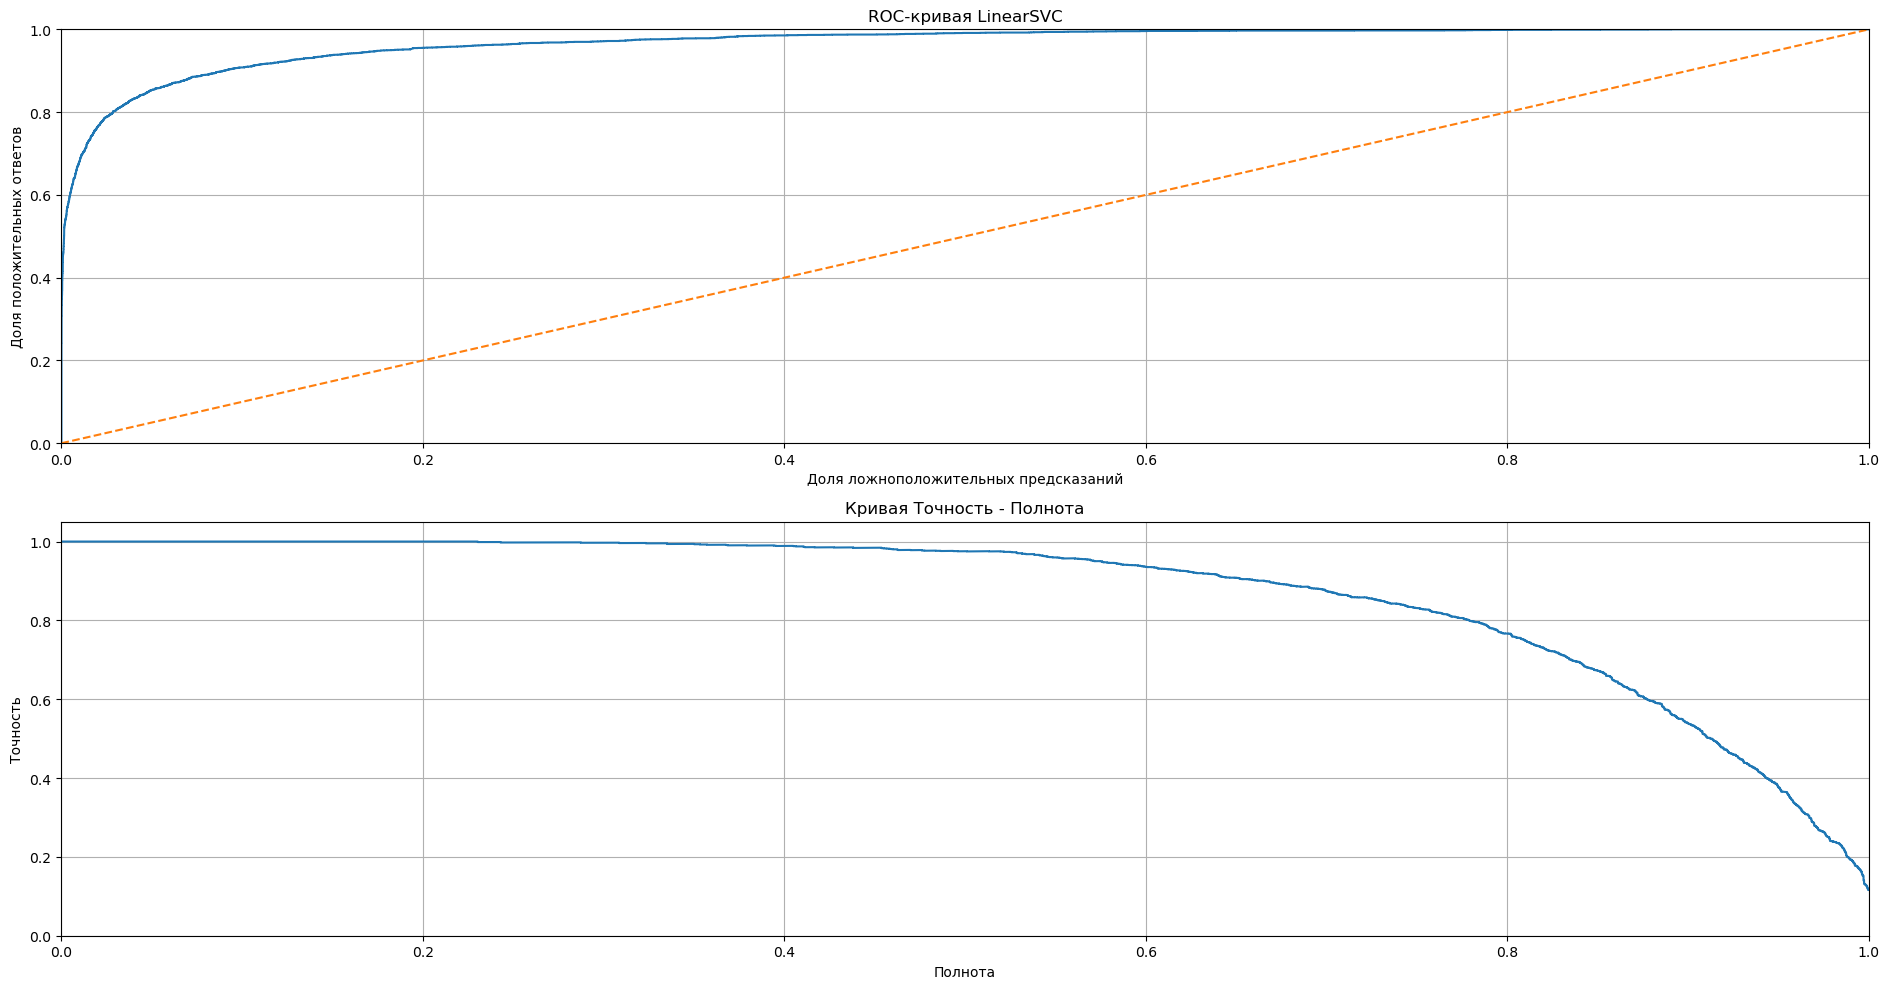

In [104]:
# Вызов функции evaluate_model для оценки производительности модели LinearSVC на тестовой выборке
f1_test_RF, recall_test_RF, precision_test_RF, roc_auc_test_RF = evaluate_model(
    best_model,                  # Обученная модель
    total_features_tf_idf,       # Признаки обучающей выборки
    total_target,                # Целевая переменная обучающей выборки
    tf_idf_features_test,        # Признаки тестовой выборки
    target_test,                 # Целевая переменная тестовой выборки
    'LinearSVC'                  # Название модели
)

Модель LinearSVC показала хорошие результаты на тестовой выборке. Значение F1-меры составило 0.78, что говорит о хорошем балансе между точностью и полнотой классификации. ROC AUC достигло 0.97, что свидетельствует о высоком качестве разделения классов моделью. При этом, модель обладает высоким значением точности (Precision) - 0.88 и умеренным значением полноты (Recall) - 0.70. Это означает, что модель хорошо определяет положительные примеры, но может пропустить некоторые из них. В целом, модель LinearSVC показала хорошие результаты и может быть использована для классификации комментариев на позитивные и негативные в интернет-магазине "Викишоп".

## Выводы

**Общий вывод:**

В данной работе была поставлена задача классификации комментариев на позитивные и негативные в интернет-магазине "Викишоп". Для решения задачи было использовано множество моделей машинного обучения, такие как Logistic Regression, LinearSVC, RandomForestClassifier, XGBClassifier, CatBoostClassifier и LGBMClassifier. Основной метрикой оценки качества моделей была выбрана F1-мера, которую необходимо было достичь не менее 0.75.

1. получили на вход таблицу с текстом и разметкой о токсичности комментариев для построения модели с целью предсказания положительных (класс 0) и отрицательных комментариев (класс 1)
2. в предобработке очистили данных от лишних символов, оставив только буквы английского алфавита и привели слова к их словарной форме (лемматизировали)
3. выявили значительную разбалансировку классов (9:1 отрицательного к положительному классу)
4. обучили шесть моделей: Logistic Regression, LinearSVC, RandomForestClassifier, XGBClassifier, CatBoostClassifier и LGBMClassifier.

**Результаты:**

1. LinearSVC с наилучшими параметрами (C=1.0, loss='squared_hinge', penalty='l2') показал отличное значение F1-меры на тестовой выборке - 0.77.

2. Другие модели также показали приемлемые результаты, но F1-мера была ниже требуемого уровня (например, RandomForestClassifier с наилучшими параметрами - F1=0.50 на валидационной выборке).

3. CatBoostClassifier и LGBMClassifier показали неплохие результаты с настройкой параметров, но не достигли требуемого уровня F1-меры.

4. Общее время обучения моделей было разным: XGBClassifier и CatBoostClassifier требовали больше всего времени.

5. Визуализация ROC-кривой и кривой Точность-Полнота позволяет оценить качество классификации для различных порогов.

**Вывод:**

Модель LinearSVC с наилучшими параметрами показала наилучший результат с F1-мерой 0.77 на тестовой выборке. Она может быть использована в качестве инструмента для автоматического определения токсичных комментариев в интернет-магазине "Викишоп". Для дальнейшего улучшения качества классификации возможно проведение дополнительной предобработки данных, подбора других признаков или дальнейшей настройки параметров модели.

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Данные загружены и подготовлены
- [ ]  Модели обучены
- [ ]  Значение метрики *F1* не меньше 0.75
- [ ]  Выводы написаны

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success"> 
<b>минутка теории</b>
    
<b>Что такое кросс-валидация</b>:

Это более системный подход, альтернатива стандартной валидационной выборке.  При кросс-валидации выборка делится на k блоков примерно одинакового размера.  Далее по очереди каждый из этих блоков используется для оценки модели (в качестве валидационной выборки), остальные используются в качестве обучающей выборки. 

После того, как каждый из блоков будет использован в качестве валидационного, мы получим k оценок качества модели. Усредняя эти оценки мы получаем оценку модели по кросс-валидации.



    
<a href="https://academy.yandex.ru/handbook/ml/article/kross-validaciya">Онлайн-учебник по машинному обучению от ШАД</a>        
    

<a href="https://github.com/minhdai2410/machine-learning-data-analysis-yandex-mipt-coursera/blob/master/2%20Supervised%20Learning/Lectures/2-1.Problema_pereobucheniya_i_bor_ba_s_nej.pdf">Конспект специализации Машинное обучение и анализ данных</a> , кросс-валидация подбробно разобрана на последних двух страницах.   
 
    

    
    
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success"> 
<b>минутка теории</b>
    
<b>Как узнать оценку по кросс-валидации при использовании поиска по сетке?</b>
 Оценка хранится в атрибуте best_score_

	from sklearn.model_selection import GridSearchCV
    gsearch = GridSearchCV(estimator=model, 
                           cv=5, 
				           param_grid=param_search,  
			               scoring=scorer)
	gsearch.fit(X, y)	
	print(f’ качество модели по кросс-валидации равно {gsearch.best_score_}’)
    
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html">Документация</a>    


<b>Как узнать оценку по кросс-валидации если гиперпараметры не подбирались?</b>
Просто применяем кросс-валидацию

	from sklearn.model_selection import cross_val_score

    scores_list = cross_val_score(estimator=model, 
                                  X=features_train, 
                                  y=target_train, 
                                  cv=5,  
                                  scoring=scorer)
    
    val_score = scores_list.mean()
    

    
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html">Документация</a>    




</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success"> 
<b>минутка теории</b>
    
<b>Используем GridSearchCV правильно</b>

При создании объекта GridSearchCV важно определить следующие составляющие:
  
  - estimator - модель, для которой будем подбирать гиперпарметры
  - param_grid  - (пространство параметров)
  - cv - схема кросс-валидации
  - scoring скорер (функция для оценки, оптимизируемая метрика)  
    
    

    from sklearn.model_selection import GridSearchCV
    gsearch = GridSearchCV(estimator=model, 
                           cv=5, 
				           param_grid=param_search,  
			               scoring=scorer)
    
    
Важно определить все составляющие, т.к. если мы что-то упустим, то они будут заменены на значения по умолчанию:
  
  - cv = 5 (стандартная кросс-валидация по 5 фолдам)
  - scoring = 'accuracy' для задачи классификации и 'r2' для регрессии. 
     
    
Часто можно использовать стандартный скорер из библиотеки sklearn (<a href="https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter">ссылка</a>), или создать собственный с помощью функции <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html">make_scorer</a>   
    
Как узнать, какие гиперпараметры можно подбирать? 
    
    model.get_params().keys()
    
  
    
    
    
Следующим шагом мы обучаем полученный объект на обучающей выборке:
    

    gsearch.fit(X, y)	

Теперь, когда объект GridSearchCV обучен, нужно посмотреть, какую информацию мы можем извлечь из него.
    
Лучшая модель хранится в атрибуте best_estimator_
    
    gsearch.best_estimator_
    
Оценка лучшей модели, полученная с помощью кросс-валидации хранится в атрибуте best_score_
    
    gsearch.best_score_
    
Параметры лучшей модели хранятся в атрубите best_params_
    
    gsearch.best_params_
    

    
Таким образом, один раз обучив объект GridSearchCV мы сразу получаем и лучшую модель и лучшие гиперпараметры и оценку модели полученную с помощью кросс-валидации. И нет  необходимости в дополнительном обучении модели и определении метрик по выделенной валидационной выборке.      
    
    
<a href="https://scikit-learn.org/stable/modules/grid_search.html">Документация</a>    




</div>